In [1]:
import flopy as fp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

flopy is installed in C:\Users\schorppl\AppData\Local\Continuum\anaconda3\lib\site-packages\flopy


In [21]:
# Define the model dimensions
nlay = 1
nrow = 10
ncol = 10
delr=10
delc=10

# Create the flopy model object and add the dis and lpf packages
m = fp.modflow.Modflow(modelname='mf2005_pst', model_ws='workspace',exe_name="../../exe/mf2005.exe")
dis = fp.modflow.ModflowDis(m, nlay, nrow, ncol,delr=delr,delc=delc,top=10,botm=0)
lpf = fp.modflow.ModflowLpf(m, hk=1e-4*np.ones([nrow,ncol]),ipakcb=53)

ibound=np.ones([nrow,ncol])
strt = np.ones([nrow,ncol])
for irow in range(nrow):
    ibound[irow,0]=-1
    strt[irow,0] = 10
    
    strt[irow,ncol-1]=0
    ibound[irow,ncol-1]=-1
bas = fp.modflow.ModflowBas(m,ibound=ibound,strt=strt)
pcg = fp.modflow.ModflowPcg(m)
# oc = fp.modflow.ModflowOc(m,chedfm="(F5.2)",stress_period_data={(0,0):["save head"]})
oc = fp.modflow.ModflowOc(m,stress_period_data={(0,0):["save head","save budget"]})

In [22]:
m.write_input()
m.run_model()

FloPy is using the following  executable to run the model: ../../exe/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005_pst.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/07/06 11:30:43

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/07/06 11:30:43
 Elapsed run time:  0.048 Seconds

  Normal termination of simulation


(True, [])

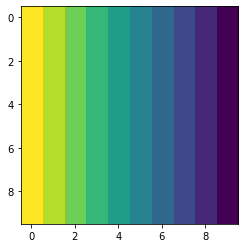

In [11]:
plt.imshow(fp.utils.HeadFile("workspace/mf2005_pst.hds").get_data((0,0))[0])

In [18]:
fp.utils.CellBudgetFile("workspace/asdfasf.cbc")

IndexError: too many indices for array

In [195]:
k = -1e-4*np.random.rand(nrow*ncol)*np.log(np.random.rand(nrow*ncol))
lpf = fp.modflow.ModflowLpf(m, hk=k.reshape(nrow,ncol))
m.write_input()
m.run_model()

****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...
FloPy is using the following  executable to run the model: ../../exe/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005_pst.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/06/16 15:36:45

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/06/16 15:36:45
 Elapsed run time:  0.100 Seconds

  Normal termination of simulation


(True, [])

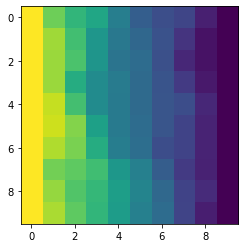

In [185]:
plt.imshow(fp.utils.HeadFile("workspace/mf2005_pst.hds").get_data((0,0))[0])